In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import geopandas as gpd
import matplotlib.pylab as plt
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
import os


puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

In [2]:
from __future__ import print_function, division
import os
import io
import sys
import pylab as pl
import optparse
import matplotlib as mpl
import numpy as np
%pylab inline
import shapely
import pysal as ps
import zipfile
import requests

import urllib


Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#download fire dispatch data

In [4]:
firedata = pd.read_csv(os.getenv("PUIDATA") + '/Fire_Incident_Dispatch_Data.csv')

In [5]:
firedata.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,1.300121e+15,01/01/2013 12:00:20 AM,BRONX,2147,ST ANN'S AVE & E138 ST,BRONX,10454.0,40.0,8.0,201.0,...,01/01/2013 12:12:01 AM,01/01/2013 12:14:23 AM,01/01/2013 12:20:06 AM,N,N,843,177,1,0,0
1,1.300108e+15,01/01/2013 12:00:37 AM,MANHATTAN,818,11 AVE & 46 ST,MANHATTAN,10036.0,18.0,3.0,104.0,...,01/01/2013 12:01:52 AM,01/01/2013 12:09:03 AM,01/01/2013 12:30:06 AM,N,Y,506,450,1,1,1
2,1.300197e+15,01/01/2013 12:01:17 AM,QUEENS,9656,JAMAICA AVE & 117 ST,QUEENS,11418.0,102.0,29.0,409.0,...,01/01/2013 12:01:43 AM,01/01/2013 12:04:55 AM,01/01/2013 12:15:18 AM,N,Y,218,210,1,0,0
3,1.300140e+15,01/01/2013 12:01:49 AM,QUEENS,4019,WYCKOFF AVE & DECATUR ST,QUEENS,11385.0,104.0,34.0,405.0,...,01/01/2013 12:03:19 AM,01/01/2013 12:06:27 AM,01/01/2013 12:24:56 AM,N,Y,278,201,3,2,1
4,1.300174e+15,01/01/2013 12:02:32 AM,QUEENS,7412,BROADWAY & 44 ST,QUEENS,11103.0,114.0,26.0,401.0,...,01/01/2013 12:03:14 AM,01/01/2013 12:07:48 AM,01/01/2013 12:40:11 AM,N,Y,316,294,2,1,1


In [6]:
firedata['ZIPCODE'].dropna(inplace = True)

In [7]:
firedata['ZIPCODE'] = pd.to_numeric(firedata['ZIPCODE'])
#firedata.astype({"ZIPCODE": int})

In [8]:
firedata_dispatch = firedata.groupby('ZIPCODE')['DISPATCH_RESPONSE_SECONDS_QY'].mean().reset_index()

In [9]:
len(firedata_dispatch['ZIPCODE'])

234

In [10]:
firedata_travel = firedata.groupby('ZIPCODE')['INCIDENT_TRAVEL_TM_SECONDS_QY'].mean().reset_index()

In [11]:
len(firedata_travel['ZIPCODE'])

234

In [12]:
firedata_travel.head()

,ZIPCODE,INCIDENT_TRAVEL_TM_SECONDS_QY
0,10000.0,262.849315
1,10001.0,238.544623
2,10002.0,221.144390
3,10003.0,195.560036
4,10004.0,237.060084


In [13]:
#Import data from New York City Map
zipmap = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/" + 
                                     "ZIP_CODE_040114.shp")

In [14]:
zipmap.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [15]:
zipmap['ZIPCODE'] = pd.to_numeric(zipmap['ZIPCODE'])

In [16]:
type(zipmap['ZIPCODE'][10])

numpy.int64

In [17]:
len(zipmap['ZIPCODE'])

263

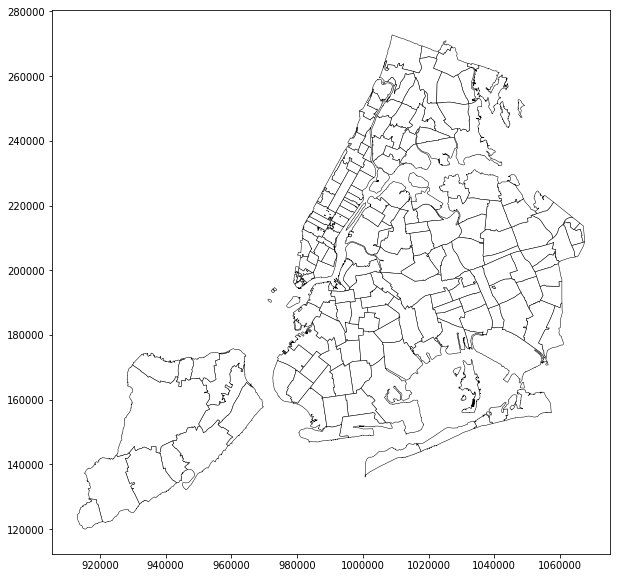

In [18]:
ax = plt.figure(figsize=(10, 10)).add_subplot(111)
zipmap.plot(color="white", edgecolor="black", lw=0.5, ax=ax)

In [62]:
zipmap.crs

{'datum': 'NAD83',
 'lat_0': 40.16666666666666,
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000,
 'y_0': 0}

In [63]:
#Merge fire data with New York City map

firezip_dispatch = zipmap.merge(firedata_dispatch, on = 'ZIPCODE')[['ZIPCODE','POPULATION','DISPATCH_RESPONSE_SECONDS_QY','geometry']]
firezip_travel = zipmap.merge(firedata_travel, on = 'ZIPCODE')[['ZIPCODE','POPULATION','INCIDENT_TRAVEL_TM_SECONDS_QY','geometry']]


In [64]:
firezip_dispatch.head()

,ZIPCODE,POPULATION,DISPATCH_RESPONSE_SECONDS_QY,geometry
0,11436,18681.0,33.164444,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,62426.0,28.394750,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,83866.0,26.637729,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,56527.0,27.251903,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,72280.0,26.238067,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [65]:
len(firezip_dispatch['ZIPCODE'])

239

In [66]:
firezip_dispatch.rename(index = str, columns = {'DISPATCH_RESPONSE_SECONDS_QY':"dispatch_response"}, inplace = True)
firezip_travel.rename(index = str, columns = {'INCIDENT_TRAVEL_TM_SECONDS_QY':"travel_time"}, inplace = True)

In [67]:
firezip_dispatch.describe()

,ZIPCODE,POPULATION,dispatch_response
count,239.000000,239.000000,239.000000
mean,10699.209205,35139.276151,35.671065
std,587.054553,29522.777836,17.001688
min,10001.000000,0.000000,18.660550
25%,10119.500000,4438.000000,28.829360
50%,10464.000000,33144.000000,32.764395
75%,11238.500000,56840.000000,36.170564
max,11697.000000,109069.000000,200.750000


In [68]:
# finding outliers
firezip_dispatch[(np.abs(firezip_dispatch['dispatch_response']- firezip_dispatch['dispatch_response'].mean())>(3*firezip_dispatch['dispatch_response'].std()))]

,ZIPCODE,POPULATION,dispatch_response,geometry
185,10055,12.0,200.750000,"POLYGON ((991432.1240753084 215895.2434561253,..."
187,10111,0.0,101.606557,"POLYGON ((990220.1635727286 215825.1858534664,..."
215,10177,0.0,100.866667,"POLYGON ((990802.5098489821 214344.9650606364,..."
222,10178,0.0,113.909091,"POLYGON ((990542.9562342316 212777.2815162092,..."
226,10158,0.0,138.111111,"POLYGON ((991057.6602573097 212137.5872575492,..."
231,10045,0.0,89.222222,"POLYGON ((981726.0220964849 197499.8675172925,..."


In [69]:
#get rid of outliers
firezip_dispatch = firezip_dispatch[np.abs(firezip_dispatch['dispatch_response'] - firezip_dispatch['dispatch_response'].mean())<=(3* firezip_dispatch['dispatch_response'].std())]

In [70]:
# finding outliers
firezip_dispatch[(np.abs(firezip_dispatch['dispatch_response']- firezip_dispatch['dispatch_response'].mean())>(3*firezip_dispatch['dispatch_response'].std()))]

,ZIPCODE,POPULATION,dispatch_response,geometry
205,10176,0.0,85.153846,"POLYGON ((990152.5045873076 214524.7878637165,..."
225,10106,0.0,57.987342,"POLYGON ((989460.1404864788 218179.6293072999,..."
230,10155,0.0,58.055556,"POLYGON ((992993.9910303056 216569.8881042153,..."


In [71]:
firezip_dispatch = firezip_dispatch[np.abs(firezip_dispatch['dispatch_response'] - firezip_dispatch['dispatch_response'].mean())<=(3* firezip_dispatch['dispatch_response'].std())]

In [72]:
#finding outliers for travel time
firezip_travel[(np.abs(firezip_travel['travel_time']- firezip_travel['travel_time'].mean())>(3*firezip_travel['travel_time'].std()))]

,ZIPCODE,POPULATION,travel_time,geometry
212,10166,0.0,725.0000,"POLYGON ((990545.5713864714 213802.2194269598,..."
220,10151,0.0,466.4375,"POLYGON ((991566.3731506467 217337.1047456264,..."


In [73]:
firezip_travel = firezip_travel[(np.abs(firezip_travel['travel_time']- firezip_travel['travel_time'].mean())<=(3*firezip_travel['travel_time'].std()))]

In [74]:
firezip_travel.describe()

,ZIPCODE,POPULATION,travel_time
count,237.000000,237.000000,237.000000
mean,10703.772152,35435.810127,241.001461
std,587.413483,29469.108533,32.836902
min,10001.000000,0.000000,127.350000
25%,10119.000000,5503.000000,222.466788
50%,10465.000000,33459.000000,237.060084
75%,11239.000000,57010.000000,257.998545
max,11697.000000,109069.000000,385.844345


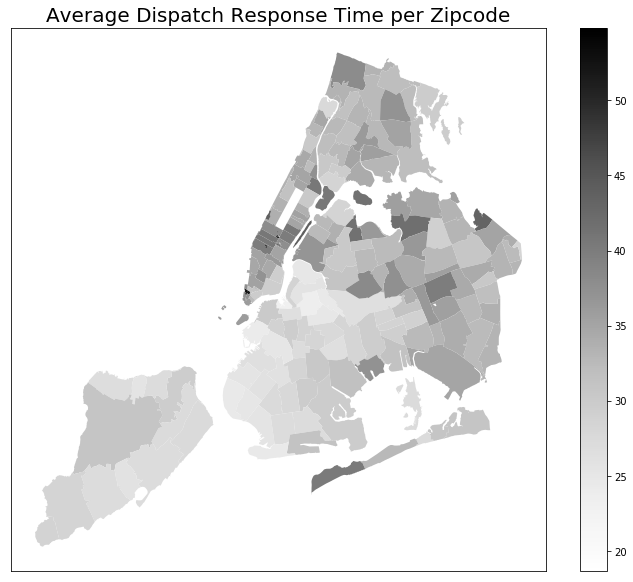

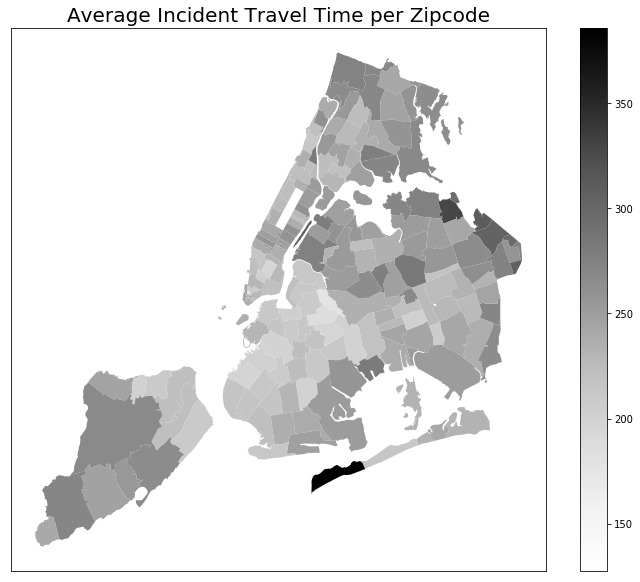

In [75]:
#plot for dispatch response time
ax = pl.figure(figsize=(12, 10)).add_subplot(111)
firezip_dispatch.plot(ax=ax,column='dispatch_response', cmap='Greys', legend=True, lw=0.5)
pl.title('Average Dispatch Response Time per Zipcode',size=20)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#plot for travel time
ax = pl.figure(figsize=(12, 10)).add_subplot(111)
firezip_travel.plot(ax=ax,column='travel_time', cmap='Greys', legend=True, lw=0.5)
pl.title('Average Incident Travel Time per Zipcode',size=20)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [79]:
firezip_dispatch.crs

{'datum': 'NAD83',
 'lat_0': 40.16666666666666,
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000,
 'y_0': 0}

In [91]:
firezip_dispatch.crs = {'init' :'epsg:4326'}

In [93]:
firezip_dispatch.head()

,ZIPCODE,POPULATION,dispatch_response,geometry
0,11436,18681.0,33.164444,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,62426.0,28.394750,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,83866.0,26.637729,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,56527.0,27.251903,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,72280.0,26.238067,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [94]:
station = pd.read_csv(os.getenv('PUIDATA') + '/FDNY_Firehouse_Listing.csv')

In [95]:
station.columns

Index(['FacilityName', 'FacilityAddress', 'Borough', 'Postcode', 'Latitude',
       'Longitude', 'Community Board', 'Community Council ', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [96]:
station = station.drop(['FacilityName','FacilityAddress', 'Borough', 'Community Board', 'Community Council ', 'BBL', 'NTA'], axis = 1)

In [97]:
station.head()

,Postcode,Latitude,Longitude,Census Tract,BIN
0,10005.0,40.703466,-74.007538,7.0,1000867.0
1,10006.0,40.710072,-74.012523,13.0,1075700.0
2,10038.0,40.710048,-74.005245,1501.0,1001287.0
3,10007.0,40.715463,-74.005938,33.0,1001647.0
4,10013.0,40.719759,-74.006678,33.0,1002150.0


In [98]:
station.Postcode.dropna(inplace = True)

In [99]:
station['Postcode'] = pd.to_numeric(station['Postcode'])

In [102]:
from shapely.geometry import Point
station['geometry'] = [Point(xy) for xy in zip(station.Longitude, station.Latitude)]
station = gpd.GeoDataFrame(station, geometry="geometry")
station.crs = {'init': 'epsg:4326'}

In [103]:
station.head()

,Postcode,Latitude,Longitude,Census Tract,BIN,geometry
0,10005.0,40.703466,-74.007538,7.0,1000867.0,POINT (-74.007538 40.703466)
1,10006.0,40.710072,-74.012523,13.0,1075700.0,POINT (-74.012523 40.710072)
2,10038.0,40.710048,-74.005245,1501.0,1001287.0,POINT (-74.005245 40.710048)
3,10007.0,40.715463,-74.005938,33.0,1001647.0,POINT (-74.005938 40.715463)
4,10013.0,40.719759,-74.006678,33.0,1002150.0,POINT (-74.00667800000001 40.719759)


In [104]:
firezip_dispatch.crs

{'init': 'epsg:4326'}

In [105]:
station.crs

{'init': 'epsg:4326'}

In [45]:
type(firezip_travel)

geopandas.geodataframe.GeoDataFrame

In [106]:
firezip_travel.to_crs(epsg=2263,inplace=True)
station.to_crs(epsg=2263,inplace=True)

In [107]:
station.head()

,Postcode,Latitude,Longitude,Census Tract,BIN,geometry
0,10005.0,40.703466,-74.007538,7.0,1000867.0,POINT (982159.9657869356 195568.1960255819)
1,10006.0,40.710072,-74.012523,13.0,1075700.0,POINT (980778.1368048259 197975.1186348805)
2,10038.0,40.710048,-74.005245,1501.0,1001287.0,POINT (982795.8812531901 197966.1700725961)
3,10007.0,40.715463,-74.005938,33.0,1001647.0,POINT (982603.8883356773 199939.0311475818)
4,10013.0,40.719759,-74.006678,33.0,1002150.0,POINT (982398.8674359065 201504.2100854376)


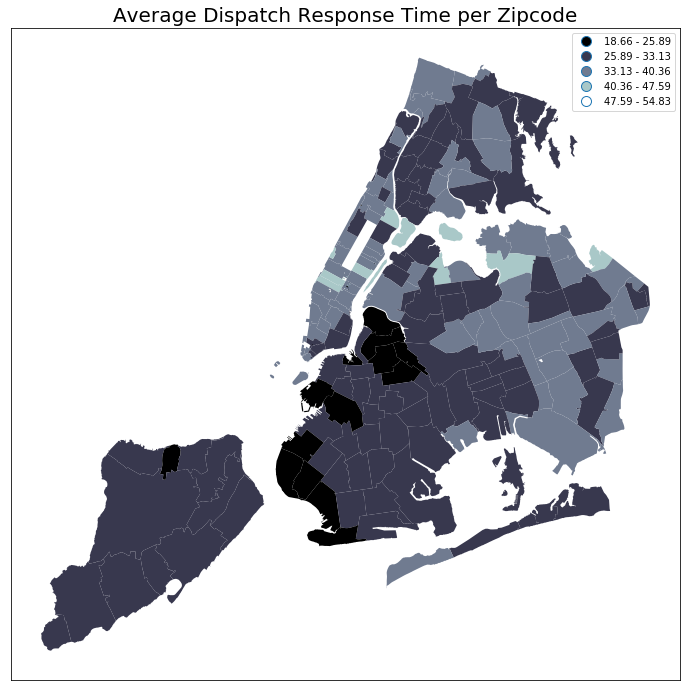

In [113]:
fig, ax = pl.subplots(figsize=(12, 12))
firezip_dispatch.plot(ax=ax,column='dispatch_response',scheme='Equal_interval', k=5,cmap='bone', legend=True, lw=1)

pl.title('Average Dispatch Response Time per Zipcode',size=20)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#leg = ax.get_legend()
# ax.set_title('Percentage of Broadband Access in NYC with LinkNYC locations', fontsize=20)
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)

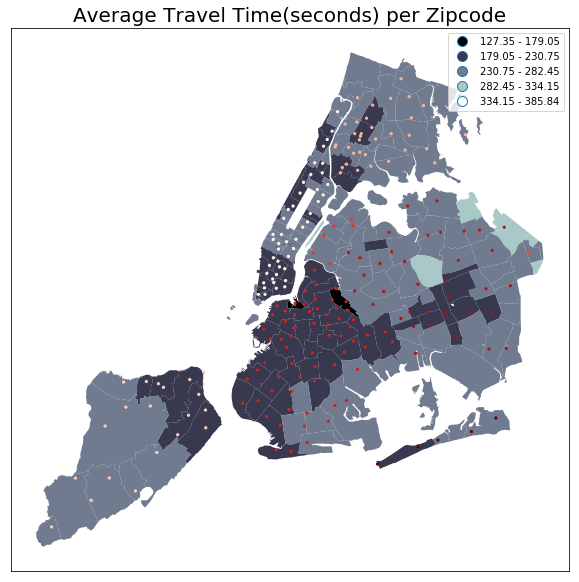

In [112]:
ax = pl.figure(figsize=(10, 10)).add_subplot(111)
firezip_travel.plot(ax=ax,column='travel_time',scheme='Equal_interval', k=5,cmap='bone', legend=True, lw=1)
station.plot(ax=ax, column = 'Postcode', cmap='Reds', markersize=5)
pl.title('Average Travel Time(seconds) per Zipcode',size=20)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

**Figure.1** Average fire incident travel time(seconds) in each area of New York City. Areas with darker color indicate longer average travel time. The map shows that Brooklyn and downtown Manhattan have long average travel time despite of the large number of fire stations in these areas.

In [367]:
firezip_travel.head()

,ZIPCODE,POPULATION,travel_time,geometry
0,11436,18681.0,206.953731,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,62426.0,217.912614,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,83866.0,213.073771,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,56527.0,223.361242,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,72280.0,208.353997,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [368]:
df = firezip_travel.drop(['geometry','ZIPCODE'], axis = 1)

In [371]:
df = pd.DataFrame(df)

In [373]:
popsum = df.POPULATION.sum()

In [375]:
timesum = df.travel_time.sum()

In [376]:
df['POPULATION'] = df['POPULATION'] / popsum

In [430]:
df['travel_time'] = df['travel_time'] / timesum

In [431]:
df.head()

,POPULATION,travel_time
0,0.002224,1.110629e-12
1,0.007433,1.169441e-12
2,0.009986,1.143473e-12
3,0.006731,1.198681e-12
4,0.008607,1.118144e-12


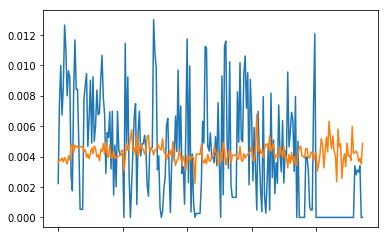

In [428]:
fig, ax = plt.subplots()
df['POPULATION'].plot()
df['travel_time'].plot()